In [13]:
import pandas as pd
import sklearn.ensemble as sken
import numpy as np
import sklearn.metrics as mts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [44]:
# df = pd.read_csv('https://raw.githubusercontent.com/thecodizt/Datasets/main/music_processed_data_encoded.csv')
df= pd.read_csv('data.csv')

In [45]:
df.head()

,Unnamed: 0,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,artist_name,composer,lyricist,language,genre_id,city,bd,gender,registered_via,registration_init_time,expiration_date
0,0,273,7641,3,8,4,1,229982,129,3782,3496,31.0,465,13,24,0,9,20110525,20170911
1,1,273,2363,3,8,3,1,224597,1640,4781,4522,3.0,465,13,24,0,9,20110525,20170911
2,2,273,4711,3,8,3,0,210364,1947,1745,2448,3.0,465,13,24,0,9,20110525,20170911
3,3,273,1892,3,8,3,1,240624,1322,1330,1705,31.0,465,13,24,0,9,20110525,20170911
4,4,273,9121,3,8,3,1,248685,1890,5744,5726,3.0,465,13,24,0,9,20110525,20170911


In [46]:
df.drop(columns='Unnamed: 0',inplace=True)

In [47]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['target']),df['target'],test_size=0.2)

In [48]:
clf = sken.AdaBoostClassifier()

In [49]:
clf.fit(x_train, y_train)

AdaBoostClassifier()

In [20]:
predicted = clf.predict(x_test)

In [21]:
mts.accuracy_score(y_test,predicted)

0.6511596548004315

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
ada_param = {"n_estimators":[50,100,300,500,1000],"learning_rate":[0.1,0.01,0.3]}

In [24]:
ada_cv = GridSearchCV(clf, ada_param, cv=3, n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [ ]:
ada_cv.best_params_

{'learning_rate': 0.3, 'n_estimators': 1000}

In [50]:
clf = sken.AdaBoostClassifier(learning_rate=0.3,n_estimators=1000)

In [51]:
clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=1000)

In [52]:
predicted = clf.predict(x_test)

In [53]:
mts.accuracy_score(y_test,predicted)

0.6590480043149946

In [26]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56      6520
           1       0.66      0.77      0.71      8312

    accuracy                           0.65     14832
   macro avg       0.65      0.63      0.63     14832
weighted avg       0.65      0.65      0.64     14832



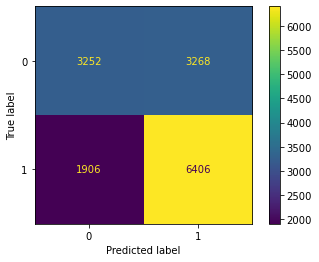

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,predicted)

In [54]:
import pickle 
filename = 'adaboost_model'
pickle.dump(clf,open(filename,'wb'))

In [42]:
x_test.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'song_length', 'artist_name', 'composer', 'lyricist',
       'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')